<a href="https://colab.research.google.com/github/haeryeong1117/haeryeong1117/blob/main/2%EB%8B%A8%EC%9B%90_1%2C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 머신러닝 알고리즘: 지도 학습(k-최근접 이웃 알고리즘), 비지도 학습
# 지도 학습: 입력(데이터; 특성 ex) 길이, 무게) + 타깃(정답 ) = 훈련 데이터
# 알고리즘이 정답을 맞히는 것을 학습 ex)도미와 방어 구분
# 비지도 학습: 타깃x, 입력만 사용
# 정답 맞힐 수 없음. 데이터 파악하거나 변형하는데 도움 줌.

In [ ]:
# 테스트 세트: 평가에 사용하는 데이터(훈련 데이터 중 일부를 이용하거나 새로운 데이터 이용)
# 훈련 세트: 훈련에 사용되는 데이터

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
# 생선의 길이와 무게를 하나의 2차원 리스트로 만듦
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35+[0]*14

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
print(fish_data[4]) # fish_data의 다섯번쨰 샘플 출력

[29.0, 430.0]


In [ ]:
print(fish_data[0:5]) # 0~4까지의 원소 출력

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [ ]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [ ]:
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
# 훈련 세트
train_input = fish_data[:35]
train_target = fish_target[:35]
# 테스트 세트
test_input = fish_data[35:]
test_target = fish_target[35:]

In [ ]:
kn = kn.fit(train_input, train_target) # 훈련 세트를 이용해 훈련
kn.score(test_input, test_target) # 테스트 세트로 평가. 정확도:0

0.0

In [ ]:
# 문제점: 마지막 14개를 테스트 세트로 떼어 놓으면 훈련 세트에는 빙어가 들어있지 않음. 빙어와 도미가 골고루 섞이게 만들어야함(샘플링 편향, 샘플링이 하나로 치우쳐져 있다)
# S: 훈련 세트와 테스트 세트를 골고루 섞은 후 뽑아야함.
# 넘파이: 고차원의 리스트 만들고 조작 가능.

In [ ]:
import numpy as np
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
print(input_arr.shape) # 배열의 크기 알려줌

(49, 2)


In [ ]:
# 무작위로 고른 샘플을 훈련 세트와 테스트 세트로 만듦.
# arange(); 0부터 1씩 증가하는 인덱스 만들고 랜덤하게 섞음.그 후 훈련 세트 35개와 테스트 세트 14개로 나눔
np.random.seed(42) # 랜덤 시드는 무작위 결과의 값을 일정하게 만듦.
index = np.arange(49) # 0부터 48까지 1씩 증가하는 인덱스 생성
np.random.shuffle(index) # 주어진 배열 무작위로 섞음

In [ ]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [ ]:
# 배열 인덱싱: 넘파이 기능. 여러개의 인덱스로 한번에 여러개의 원소 선택 가능
print(input_arr[[1,3]]) # 두번째와 네번쨰 샘플 선택 후 출력

[[ 26.3 290. ]
 [ 29.  363. ]]


In [ ]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [ ]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [ ]:
# 테스트 세트 생성
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [ ]:
test_input

array([[ 10.6,   7. ],
       [  9.8,   6.7],
       [ 35. , 680. ],
       [ 11.2,   9.8],
       [ 31. , 475. ],
       [ 34.5, 620. ],
       [ 33.5, 610. ],
       [ 15. ,  19.9],
       [ 34. , 575. ],
       [ 30. , 390. ],
       [ 11.8,   9.9],
       [ 32. , 600. ],
       [ 36. , 850. ],
       [ 11. ,   9.7]])

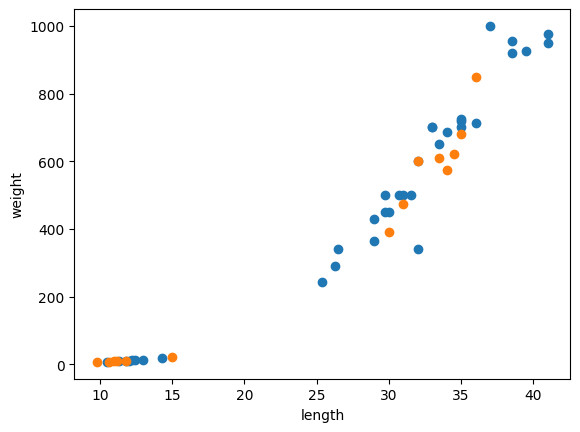

In [ ]:
# 잘 섞여있는지 산점도 그리기
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 도미와 빙어가 고루 섞여있음.

In [ ]:
kn = kn.fit(train_input, train_target) #train_input과 train_target으로 모델 훈련
kn.score(test_input, test_target) # 모델 테스트. 정확도 1.0

1.0

In [ ]:
kn.predict(test_input) # 테스트 세트가 어느 집합에 속하는지 예측

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [2]:
# 02-2 데이터 전처리
## (1) 데이터 준비 ##
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
import numpy as np

In [4]:
# coulmn_stack(): 전달받은 리스트를 일렬로 세운 다음 나란히 연결
np.column_stack(([1,2,3], [4,5,6])) # 두 리스트를 나란히 붙일 수 있음 튜플(리스트와 비슷함)로 전달.

array([[1, 4],
       [2, 5],
       [3, 6]])

In [5]:
fish_data = np.column_stack((fish_length, fish_weight))

In [6]:
print(fish_data[:5]) # 처음 5개의 데이터 확인

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [7]:
# np.ones(), np.zeros(): 원하는 개수의 1과 0을 채운 배열 생성
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [8]:
# np.concatenate(): 행 하나로 두 배열 쭉 연결
fish_target = np.concatenate((np.ones(35), np.zeros(14))) # 1이 35개, 0이 14개인 함수 생성
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [9]:
## (2) 훈련 세트와 테스트 세트 나누기 ##
from sklearn.model_selection import train_test_split # train_test_split(); 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나누어줌.(알아서 섞어줌)

In [10]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)
# fish_data, fish_target 2개의 배열을 2개씩 나누어 총 4개의 배열이 반환

In [11]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [12]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [13]:
print(test_target) # 문제: 빙어(0)의 비율 조금 모자름. 샘플링 편향 발생
# 해결: stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터 나눔.

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify = fish_target, random_state = 42
)

In [15]:
print(test_target) # 테스트 세트의 비율 2.25:1 됨. 해결!

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [16]:
## (3) k-최근접 이웃 훈련 ##
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target) # 훈련 데이터로 모델 훈련
kn.score(test_input, test_target) # 테스트 데이터로 모델 평가

1.0

In [17]:
print(kn.predict([[25, 150]])) #25, 150인 도미 데이터(1)를 넣고 테스트
# 그러나 결과 0!!

[0.]


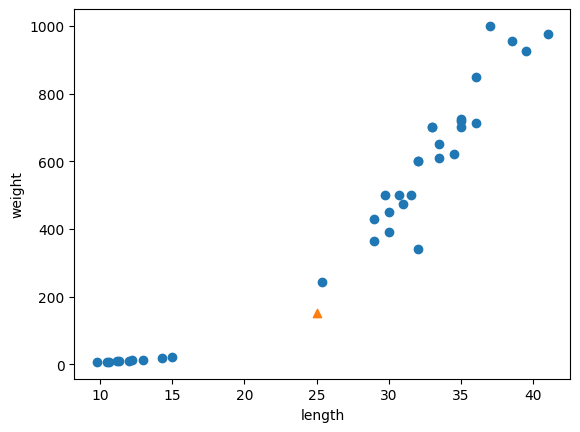

In [18]:
# 산점도 작성
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^') # marker: 모양 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 25, 150 샘플 도미 데이터에 더 가까운데 왜 빙어 데이터에 가깝다고 판단한 것일까?

In [19]:
distances, indexes = kn.kneighbors([[25, 150]])

In [20]:
kn.kneighbors([[25, 150]])

(array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
         138.39320793]]),
 array([[21, 33, 19, 30,  1]]))

Text(0, 0.5, 'weight')

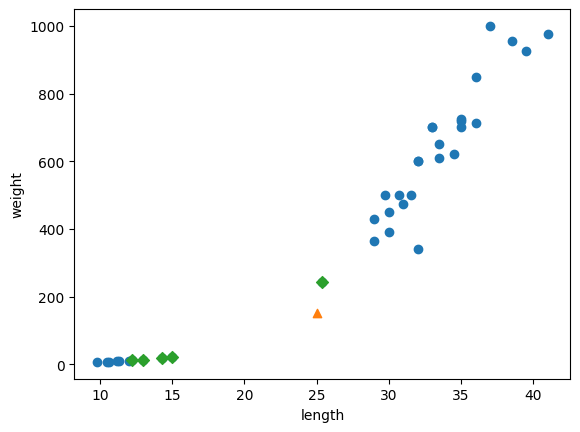

In [21]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes, 0], train_input[indexes,1], marker = 'D') # marker = 'D': 다이아몬드 형태의 산점도
plt.xlabel('length')
plt.ylabel('weight') # 삼각형 샘플에 가장 가까운 5개의 샘플 초록 다이아몬드로 표시

In [22]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [23]:
print(train_target[indexes]) # 25, 150인 생선과 가까운 5개의 데이터중 도미 하나와 빙어 4개 존재 ~> 25,150은 빙어가 아닐까? 생각할수도 있으나 실제로 산점도에서는 도미와 더 가까움

[[1. 0. 0. 0. 0.]]


In [24]:
# 해결: distance 배열을 출력. 이웃 샘플과의 거리가 담겨있음
print(distances) # 산점도를 보았을 때 x축의 범위가 좁고, y축의 범위가 넓어 90과 130이라기에는 산점도에는 차이가 크게보임 ~> 도미 샘플이 이웃으로 선택되지 못함.

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


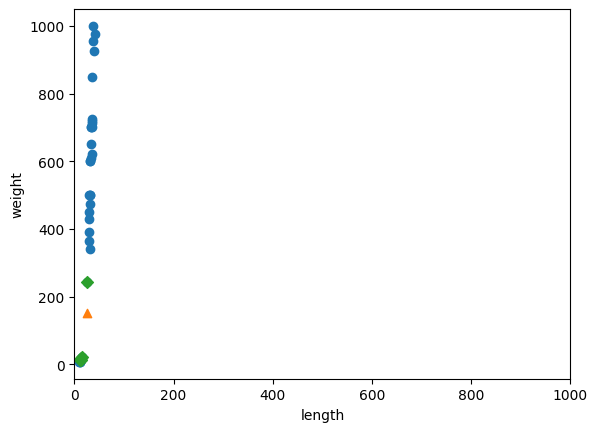

In [25]:
# 해결: x축과 y축의 범위를 동일하게 맞춤(x축의 범위도 y와 같게 0~1000으로)
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker = 'D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 이제 범위를 같게 두어 x축의 영향 감소, y축의 영향 증가

In [26]:
# 두 특성의 범위(스케일) 다르면 알고리즘이 올바르게 예측 불가. knn도 포함. -> 해결. 범위 일정한 기준으로 맞춰주어야함>>데이터 전처리<<
# 표준점수(z점수): 가장 널리 사용하는 전처리 방법. 각 특성값이 0에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냄. (표준점수) = (값-평균)/(표준편차)

In [27]:
# np.mean(), np.std(): 평균, 표준편차 계산
mean = np.mean(train_input, axis = 0) # 행을 따라 계산, 1은 열.
std = np.std(train_input, axis = 0)

In [28]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [29]:
train_scaled = (train_input - mean)/std # 훈련 세트의 mean과 std를 이용해 변환해야함.

In [30]:
train_scaled # 브로드캐스팅

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

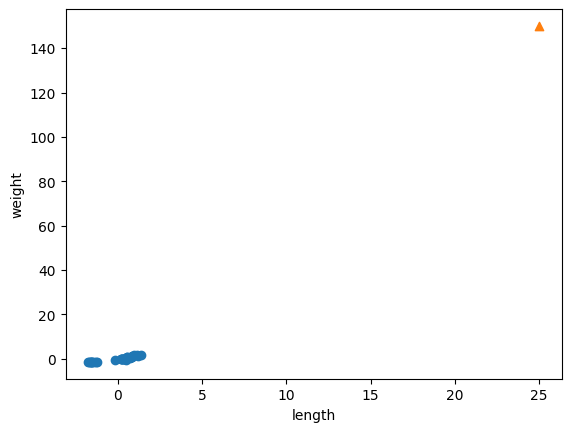

In [31]:
plt.scatter(train_scaled[:, 0], train_scaled[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() #훈련 세트를 z값으로 바꾸어주어 값의 범위가 달라짐.

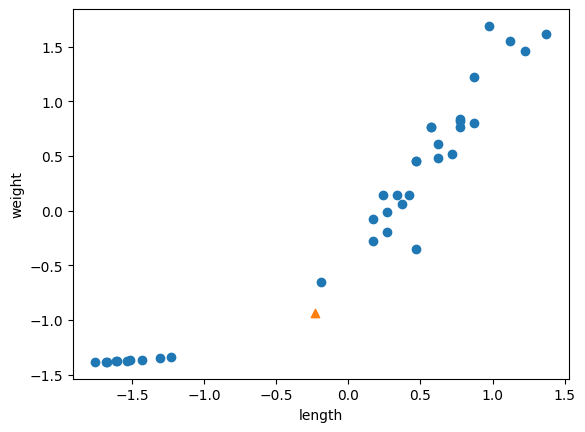

In [33]:
# [25, 150]도 동일한 기준으로 변환하고 산점도 그림.
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show() # 변환 전의 산점도와 거의 동일하나 x축과 y축의 범위가 1.5~-1.5 사이로 바뀜

In [34]:
new

array([-0.23012627, -0.94060693])

In [35]:
kn.fit(train_scaled, train_target) # 훈련 후 테스트 세트로 평가할 떄 단위도 z값 이용

KNeighborsClassifier()

In [36]:
test_scaled = (test_input - mean)/std

In [37]:
kn.score(test_scaled, test_target) # 모델 평가. 정확도 1. 완벽!

1.0

In [38]:
print(kn.predict([new])) # 도미(1)로 예측!

[1.]


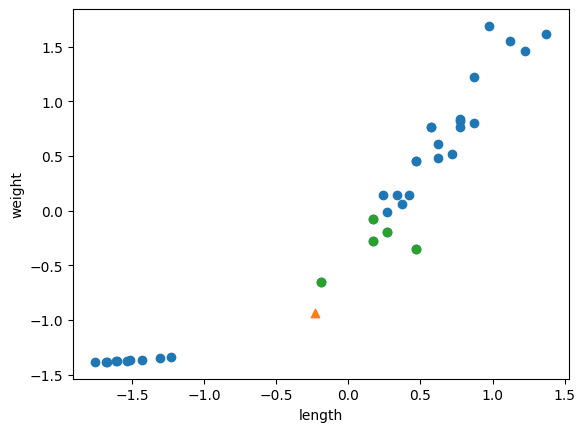

In [41]:
# knn을 구하고 산점도로 그려봄. 특성을 표준점수(z)로 바꾸었기 때문에 knn이 올바르게 거리를 측정했을 것
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show() #가장 가까운 샘플 5개 모두 도미로 나옴. [25, 150]은 도미라는걸 알 수 있음!! 안정적인 예측

In [ ]:
## 스케일이 다른 특성 처리
# S: 표준점수(z값) 처리